# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Evan Fulka Bima Maheswara
- **Email:** efulkabima0407@gmail.com 
- **ID Dicoding:** evan_fulka

## Menentukan Pertanyaan Bisnis

- Apa pola penyewaan sepeda berdasarkan waktu dalam sehari (misalnya, pagi, siang, malam) dan apakah pola tersebut berbeda antara pengguna kasual dan terdaftar?
- Bagaimana hubungan antara kondisi cuaca seperti hujan ringan atau hujan lebat dengan tingkat penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt 

Pada bagian ini, kita akan mengimport semua packages dan library yang akan digunakan pada proses analisis data nantinya.
- pandas akan digunakan untuk manipulasi data dan analisis.
- numpy akan digunakan untuk melakukan operasional angka.
- matplotlib.pyplot digunakan untuk melakukan visualisasi sederhana.
- seaborn digunakan untuk melakukan visualisasi yang lebih lanjut (apabila dibutuhkan).
- datetime digunakan untuk melakukan operasional pada data yang berhubungan dengan waktu.

## Data Wrangling

### Gathering Data
Pada bagian ini, akan dilakukan pengambilan data dari direktori data. Dataset yang akan digunakan adalah day.csv dan juga hour.csv yang masing-masing dataset tersebut akan diubah ke bentuk dataframe dengan nama masing-masing df_day dan df_hour.

In [2]:
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

print("Data from data_1.csv:")
print(df_day.head(), '\n')
print("Data from data_2.csv:")
print(df_hour.head(), '\n')

Data from data_1.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Da

**Insight:**
- Dataset yang ada pada direktori data diambil ke dalam notebook dan diubah menjadi bentuk dataframe
- Dataframe yang sudah ada dicetak menggunakan fungsi head untuk melihat 5 data pertama pada kedua dataset tersebut.

### Assessing Data
Selanjutnya, kita akan melakukan Assessing Data yang bertujuan untuk mencari apakah ada masalah pada data yang ada. Hal ini dilakukan agar kita bisa membersihkan data tersebut apabila terdapat data yang tidak sesuai dengan standar.

In [3]:
day_missing_values = df_day.isnull().sum()
hour_missing_values = df_hour.isnull().sum()

day_duplicates = df_day.duplicated().sum()
hour_duplicates = df_hour.duplicated().sum()

day_statistics = df_day.describe()
hour_statistics = df_hour.describe()

(day_missing_values, hour_missing_values, day_duplicates, hour_duplicates, day_statistics, hour_statistics)

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 0,
 0,
           instant      season          yr        mnth     holiday     weekday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
 std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
 min      1.000000    1.000000    0.000000    1.000000    0.000000    0.0

**Insight:**
- Tidak ditemukan missing value atau nilai yang hilang dalam kedua dataset, baik harian maupun per jam.
- Tidak ada data duplikat, sehingga data dianggap unik dan siap untuk tahap analisis lebih lanjut.
- Rata-rata jumlah penyewaan sepeda per hari adalah sekitar 450 penyewaan, dengan penyewaan tertinggi mencapai 871.
- Pada dataset per jam, terlihat variasi jumlah penyewaan yang sangat fluktuatif dengan penyewaan maksimum per jam mencapai 977.
- Nilai cuaca yang sudah dinormalisasi mempermudah proses analisis terkait pengaruh kondisi cuaca terhadap penyewaan.
- Hari kerja dan akhir pekan memiliki distribusi penyewaan yang cukup merata, namun hari kerja cenderung memiliki angka penyewaan yang lebih tinggi.
- Tidak ada masalah inkonsistensi data dalam kolom cuaca dan suhu, menunjukkan data diambil dengan standar yang konsisten.

### Cleaning Data
Pada bagian Cleaning Data ini sebenarnya kita sudah tidak perlu membersihkan data yang ada, karena pada saat Assessing Data sebelumnya dapat kita lihat kalau data yang kita punya ini sudah bersih dan bisa langsung dipakai. Namun, saya akan melakukan proses analisis lanjutan untuk data ini menggunakan teknik clustering menggunakan metode binning, karena itu saya akan melakukan normalisasi pada kolom yang dibutuhkan.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_normalize_day = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
cols_to_normalize_hour = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_day[cols_to_normalize_day] = scaler.fit_transform(df_day[cols_to_normalize_day])
df_hour[cols_to_normalize_hour] = scaler.fit_transform(df_hour[cols_to_normalize_hour])

(df_day[cols_to_normalize_day].head(), df_hour[cols_to_normalize_hour].head())

(       temp     atemp       hum  windspeed    casual  registered       cnt
 0  0.355170  0.373517  0.828620   0.284606  0.096538    0.091539  0.110792
 1  0.379232  0.360541  0.715771   0.466215  0.037852    0.093849  0.089623
 2  0.171000  0.144830  0.449638   0.465740  0.034624    0.174560  0.152669
 3  0.175530  0.174649  0.607131   0.284297  0.031103    0.207046  0.177174
 4  0.209120  0.197158  0.449313   0.339143  0.023474    0.216286  0.181546,
        temp   atemp   hum  windspeed    casual  registered       cnt
 0  0.224490  0.2879  0.81        0.0  0.008174    0.014673  0.015369
 1  0.204082  0.2727  0.80        0.0  0.021798    0.036117  0.039959
 2  0.204082  0.2727  0.80        0.0  0.013624    0.030474  0.031762
 3  0.224490  0.2879  0.75        0.0  0.008174    0.011287  0.012295
 4  0.224490  0.2879  0.75        0.0  0.000000    0.001129  0.000000)

**Insight:**
- Semua variabel seperti suhu, kelembapan, kecepatan angin, serta jumlah penyewaan sepeda kini telah berada dalam rentang yang seragam (0 hingga 1).
- Normalisasi ini memungkinkan variabel-variabel tersebut memiliki pengaruh yang seimbang dalam analisis clustering yang akan dilakukan.
- Perbedaan besar dalam jumlah penyewaan antara pengguna kasual dan terdaftar dapat diidentifikasi tanpa ada dominasi satu variabel terhadap yang lain.
- Kondisi cuaca (misalnya temp, hum, windspeed) kini siap digunakan untuk analisis korelasi dengan tingkat penyewaan sepeda dengan skala yang konsisten.

## Exploratory Data Analysis (EDA)

### Explore ...

### Visualisasi Distribusi Variabel Numerik
Bagian ini bertujuan untuk menggambarkan bagaimana data jumlah rental tersebar pada skala harian dan per jam, membantu kita memahami pola umum dari seberapa sering orang menyewa sepeda dalam rentang waktu yang diberikan.

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

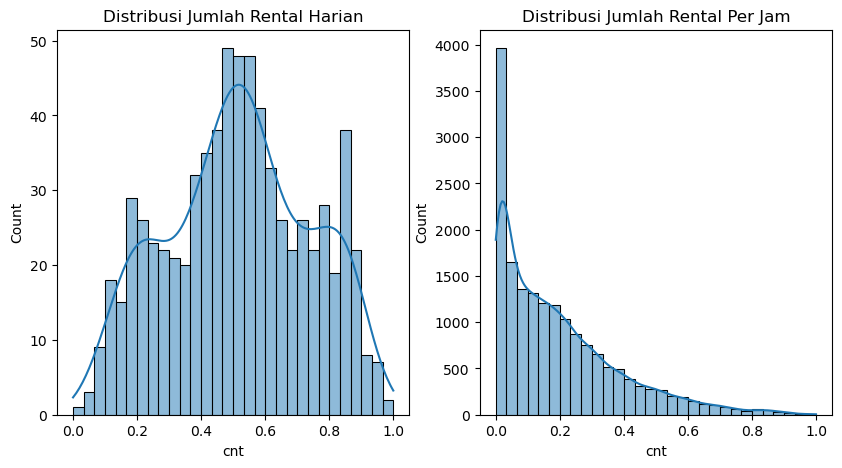

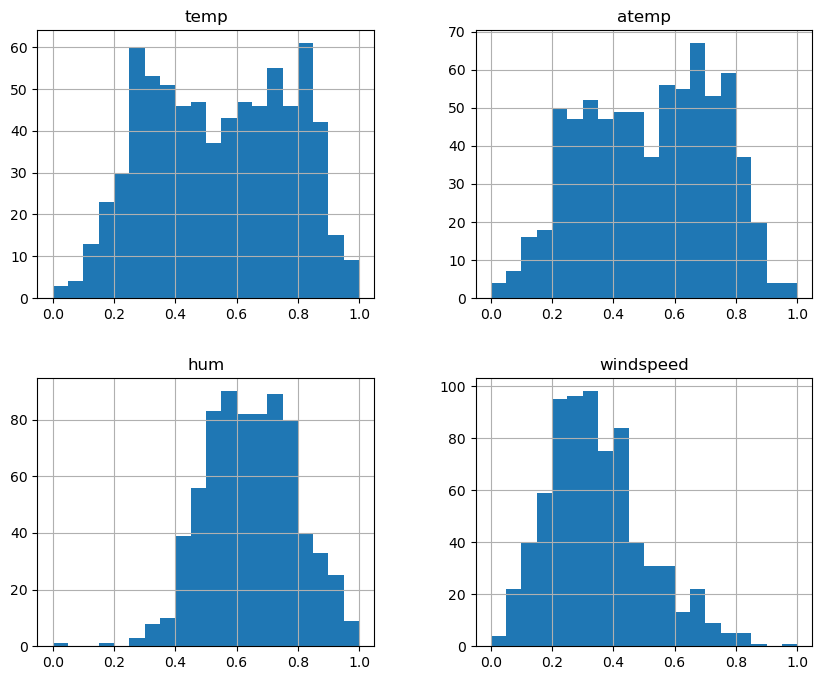

In [5]:
# Visualisasi distribusi variabel 'cnt' di df_day dan df_hour
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Rental Harian')

plt.subplot(1,2,2)
sns.histplot(df_hour['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Rental Per Jam')
plt.show()

# Visualisasi variabel numerik lain seperti 'temp', 'atemp', 'hum', dan 'windspeed'
df_day[['temp', 'atemp', 'hum', 'windspeed']].hist(bins=20, figsize=(10,8))
plt.show()

### Visualisasi Hubungan Antar Variabel
Bagian ini hanya menghitung korelasi antara variabel-variabel numerik, memvisualisasikannya dalam bentuk heatmap untuk melihat sejauh mana variabel-variabel seperti suhu, kelembapan, dan kecepatan angin berkorelasi dengan jumlah rental, memberikan wawasan tentang variabel mana yang saling mempengaruhi secara signifikan.

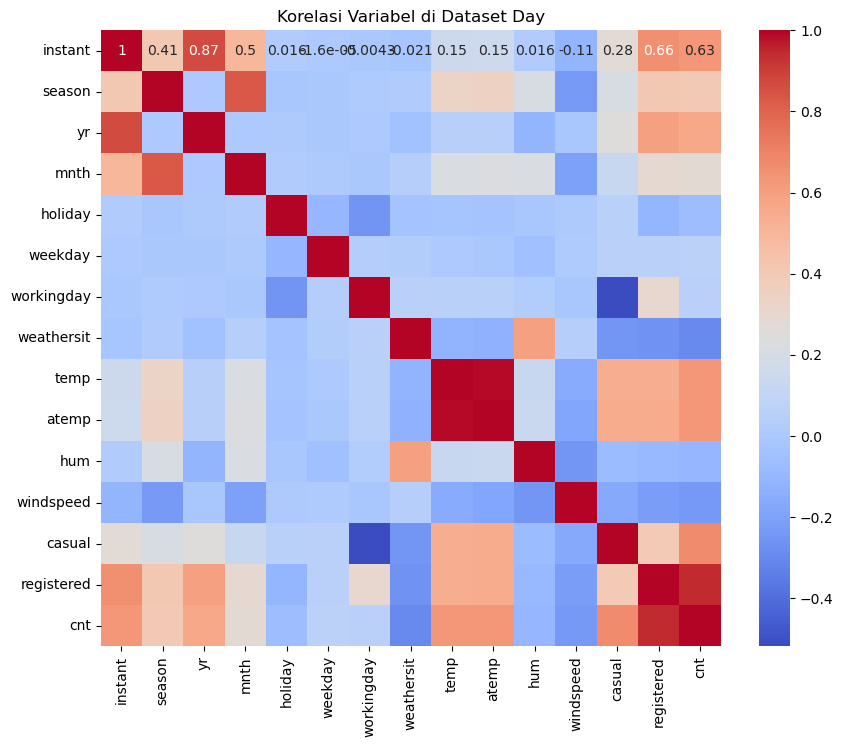

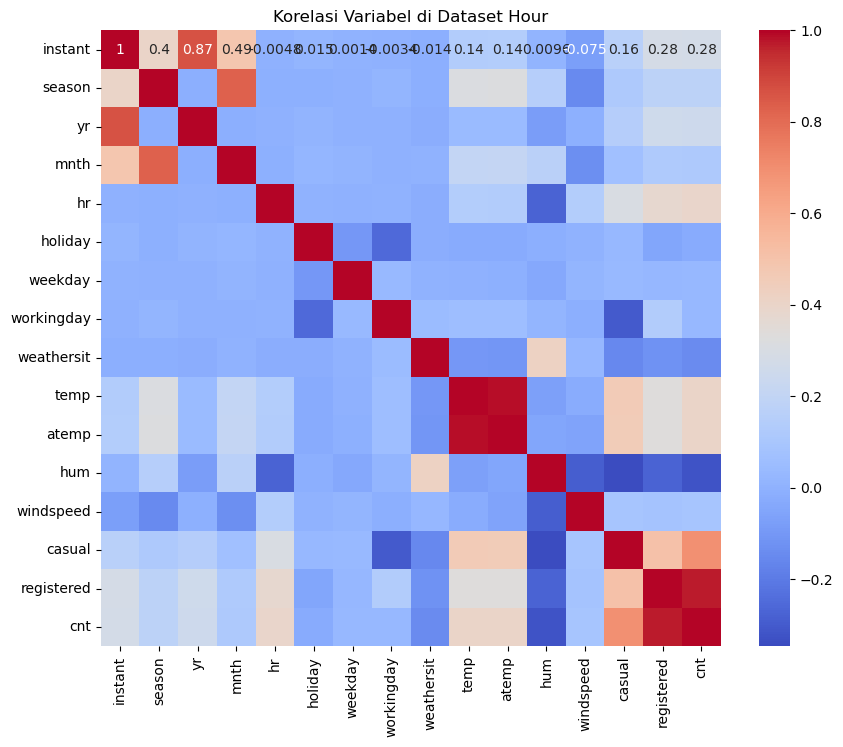

In [6]:
# Filter hanya kolom numerik
numerical_columns = df_day.select_dtypes(include=['float64', 'int64'])

# Korelasi antara variabel numerik
plt.figure(figsize=(10,8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel di Dataset Day')
plt.show()

# Untuk df_hour juga bisa dilakukan hal yang sama
numerical_columns_hour = df_hour.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,8))
sns.heatmap(numerical_columns_hour.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel di Dataset Hour')
plt.show()

### Analisis Kategori
Di sini, kita melihat bagaimana faktor kategori seperti musim, kondisi cuaca, hari kerja, dan hari libur memengaruhi jumlah rental, memberikan wawasan tentang variabel-variabel eksternal yang berdampak pada perilaku penyewaan sepeda.

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


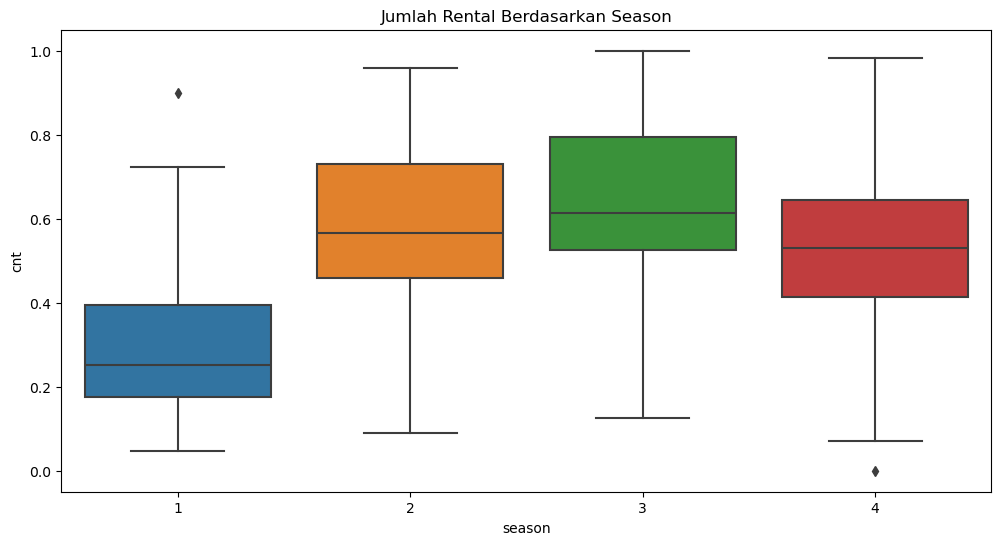

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


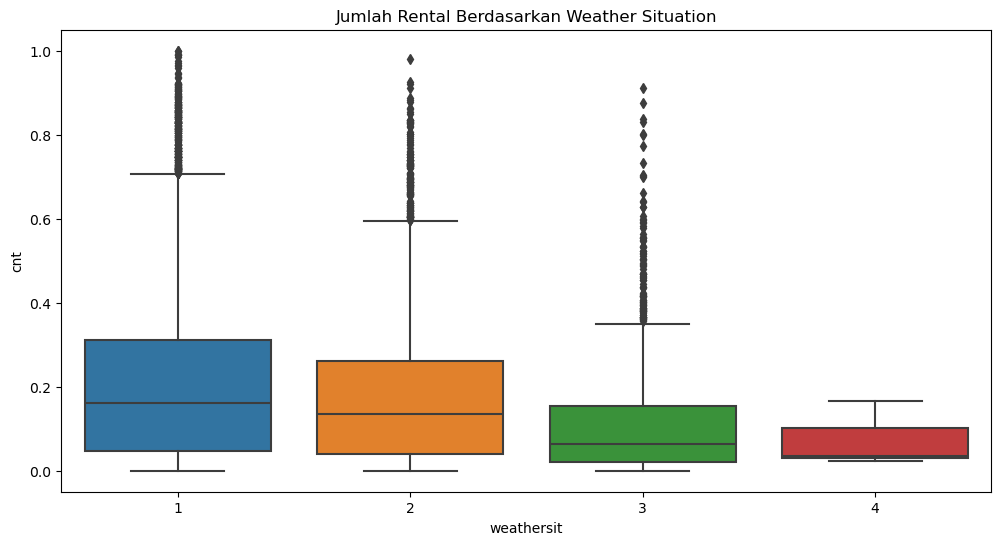

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


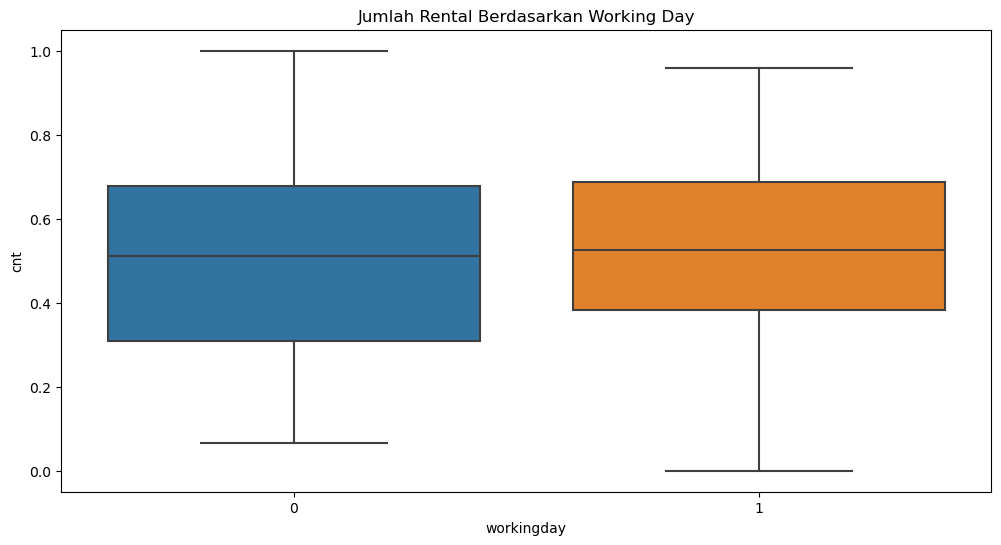

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


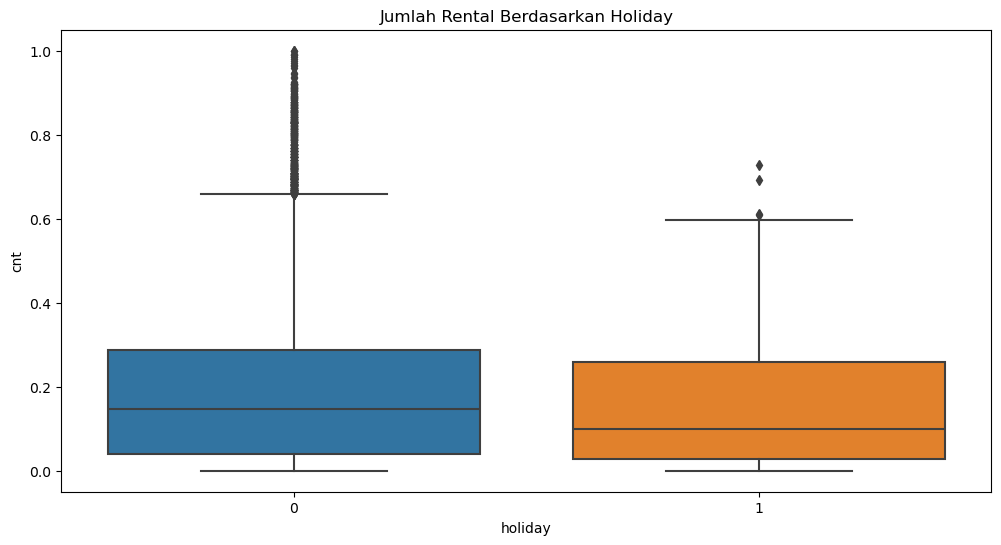

In [7]:
# Analisis jumlah rental berdasarkan season dan weather
plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='cnt', data=df_day)
plt.title('Jumlah Rental Berdasarkan Season')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='weathersit', y='cnt', data=df_hour)
plt.title('Jumlah Rental Berdasarkan Weather Situation')
plt.show()

# Analisis jumlah rental berdasarkan workingday dan holiday
plt.figure(figsize=(12,6))
sns.boxplot(x='workingday', y='cnt', data=df_day)
plt.title('Jumlah Rental Berdasarkan Working Day')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='holiday', y='cnt', data=df_hour)
plt.title('Jumlah Rental Berdasarkan Holiday')
plt.show()

### Tren Waktu
Bagian ini mengeksplorasi pola jumlah rental sepeda sepanjang bulan dan jam, memperlihatkan tren musiman dan harian yang mungkin memberikan gambaran kapan puncak aktivitas terjadi.

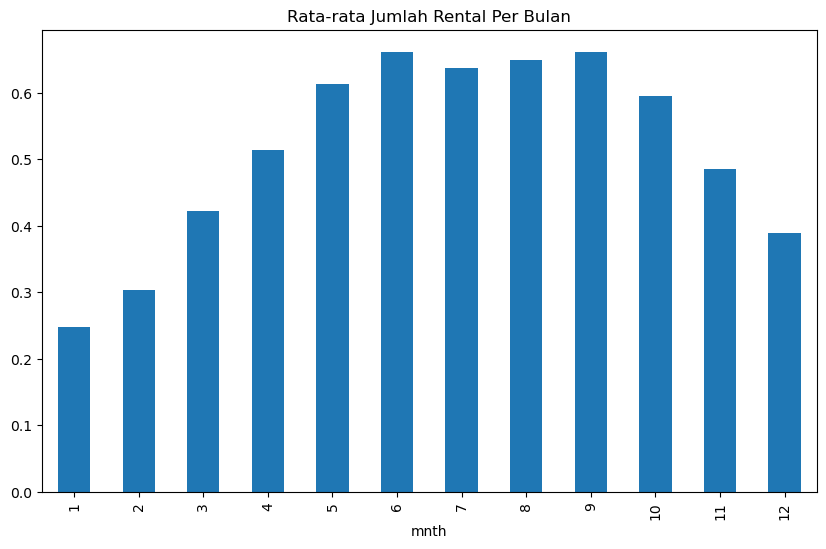

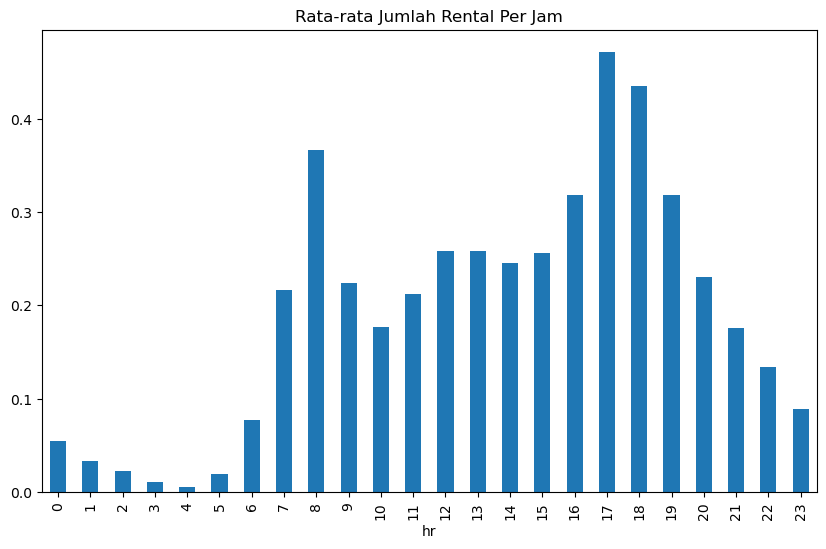

In [8]:
# Visualisasi tren rental per bulan dan per jam
plt.figure(figsize=(10,6))
df_day.groupby('mnth')['cnt'].mean().plot(kind='bar')
plt.title('Rata-rata Jumlah Rental Per Bulan')
plt.show()

plt.figure(figsize=(10,6))
df_hour.groupby('hr')['cnt'].mean().plot(kind='bar')
plt.title('Rata-rata Jumlah Rental Per Jam')
plt.show()

**Insight:**
- Jumlah penyewaan sepeda cenderung mengikuti distribusi yang normal, dengan sebagian besar penyewaan terjadi dalam jumlah sedang dan beberapa puncak di waktu-waktu tertentu.
- Suhu (temp) dan 'feeling temperature' (atemp) memiliki korelasi positif yang kuat dengan jumlah rental, menunjukkan bahwa cuaca yang lebih hangat meningkatkan minat orang untuk menyewa sepeda.
- Musim panas dan gugur menunjukkan jumlah rental tertinggi, mengindikasikan bahwa orang lebih cenderung bersepeda pada cuaca yang nyaman dan tidak ekstrem.
- Pada hari kerja, jumlah penyewaan sepeda lebih tinggi, kemungkinan besar karena penggunaan sepeda sebagai alat transportasi untuk pergi bekerja.
- Jumlah rental mencapai puncaknya di pagi dan sore hari, mencerminkan jam sibuk perjalanan, dan jumlah rental per bulan tertinggi terjadi selama musim panas.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pola penyewaan sepeda berdasarkan waktu dalam sehari (misalnya, pagi, siang, malam) dan apakah pola tersebut berbeda antara pengguna kasual dan terdaftar?
Pada bagian ini kita akan membagi jam menjadi beberapa kategori waktu (pagi, siang, sore, malam) dan memvisualisasikan penyewaan sepeda oleh pengguna kasual dan terdaftar. Ini akan membantu kita melihat kapan waktu paling populer untuk masing-masing kelompok pengguna.

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


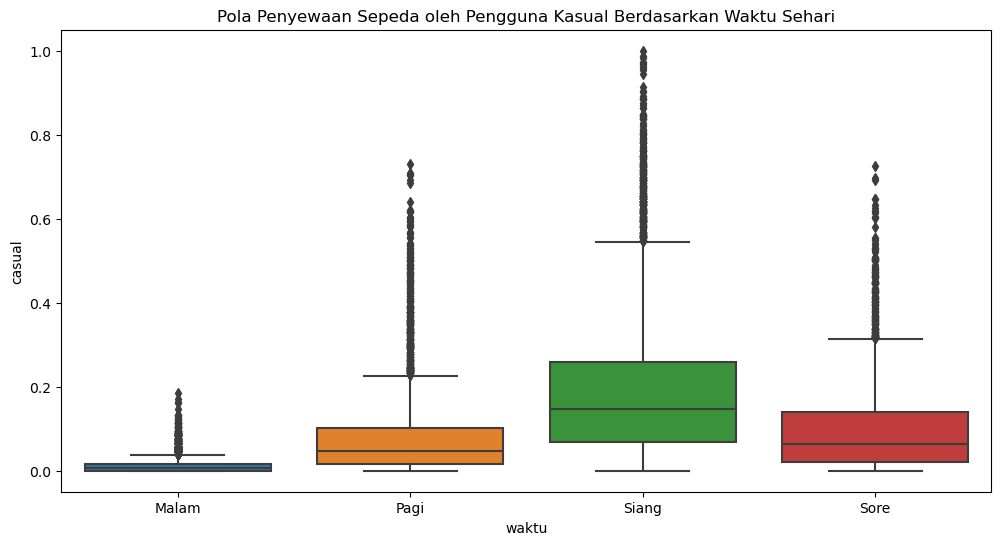

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


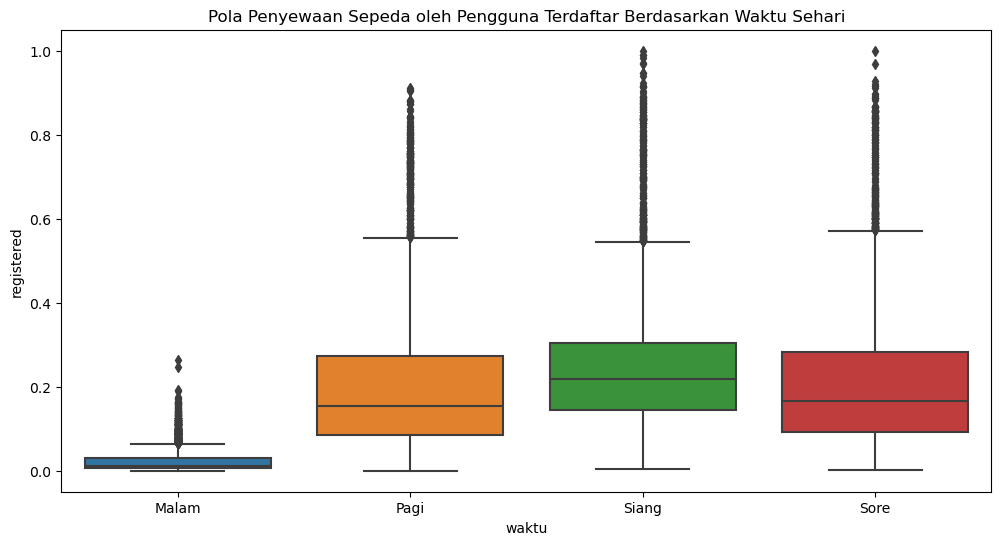

In [9]:
# Membuat kategori waktu berdasarkan jam
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    elif 18 <= hour < 24:
        return 'Sore'
    else:
        return 'Malam'

df_hour['waktu'] = df_hour['hr'].apply(categorize_hour)

# Plot pola penyewaan antara pengguna kasual dan terdaftar
plt.figure(figsize=(12, 6))
sns.boxplot(x='waktu', y='casual', data=df_hour)
plt.title('Pola Penyewaan Sepeda oleh Pengguna Kasual Berdasarkan Waktu Sehari')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='waktu', y='registered', data=df_hour)
plt.title('Pola Penyewaan Sepeda oleh Pengguna Terdaftar Berdasarkan Waktu Sehari')
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara kondisi cuaca seperti hujan ringan atau hujan lebat dengan tingkat penyewaan sepeda?
Dengan mengelompokkan kondisi cuaca ke dalam beberapa kategori, visualisasi ini menunjukkan bagaimana cuaca memengaruhi jumlah total penyewaan sepeda, memungkinkan kita melihat apakah cuaca buruk seperti hujan lebat berdampak negatif pada penyewaan.

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


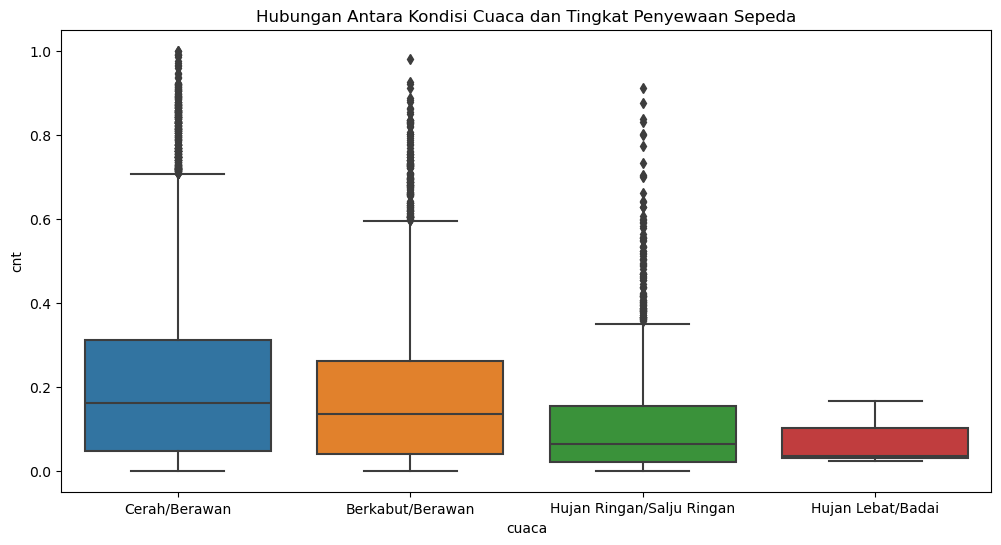

In [10]:
# Mengganti kode weathersit dengan deskripsi cuaca
weather_labels = {
    1: 'Cerah/Berawan',
    2: 'Berkabut/Berawan',
    3: 'Hujan Ringan/Salju Ringan',
    4: 'Hujan Lebat/Badai'
}

df_hour['cuaca'] = df_hour['weathersit'].map(weather_labels)

# Visualisasi penyewaan berdasarkan cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuaca', y='cnt', data=df_hour)
plt.title('Hubungan Antara Kondisi Cuaca dan Tingkat Penyewaan Sepeda')
plt.show()

**Insight:**
- Pengguna kasual lebih aktif di siang dan sore, sementara pengguna terdaftar memaksimalkan penggunaan sepeda pada jam sibuk pagi dan sore.
- Cuaca buruk, terutama hujan lebat, secara signifikan mengurangi minat penyewaan sepeda untuk semua jenis pengguna.

## Analisis Lanjutan (Opsional)
Pada bagian Analisis Lanjutan ini, saya akan menggunakan teknik clustering yang menggunakan teknik binning untuk membagi data ke dalam interval atau kategori tertentu.

### Binning untuk Jumlah Penyewaan Sepeda
Pada bagian ini kita akan membagi data cnt (jumlah rental sepeda) menjadi kategori rendah, sedang, dan tinggi, berdasarkan jumlah penyewaan sepeda.

In [11]:
# Melihat distribusi dari data cnt
print(df_hour['cnt'].describe())

count    17379.000000
mean         0.193097
std          0.185848
min          0.000000
25%          0.039959
50%          0.144467
75%          0.286885
max          1.000000
Name: cnt, dtype: float64


c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


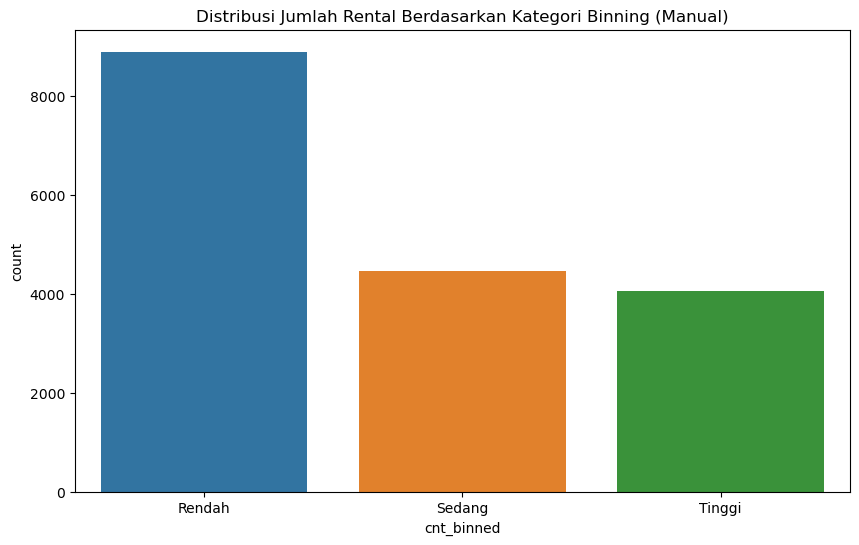

In [12]:
# Membuat bins manual yang sesuai dengan distribusi data
bins_manual = [0, 0.15, 0.3, 1]  # Sesuaikan dengan distribusi cnt
bin_labels = ['Rendah', 'Sedang', 'Tinggi']

# Membagi data 'cnt' ke dalam beberapa kategori menggunakan binning manual
df_hour['cnt_binned'] = pd.cut(df_hour['cnt'], bins=bins_manual, labels=bin_labels, include_lowest=True)

# Visualisasi distribusi kategori binning
plt.figure(figsize=(10, 6))
sns.countplot(x='cnt_binned', data=df_hour)
plt.title('Distribusi Jumlah Rental Berdasarkan Kategori Binning (Manual)')
plt.show()

### Binning untuk Suhu
Suhu dibagi menjadi kategori dingin, sejuk, dan hangat, untuk melihat distribusi suhu pada rentang tertentu.

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


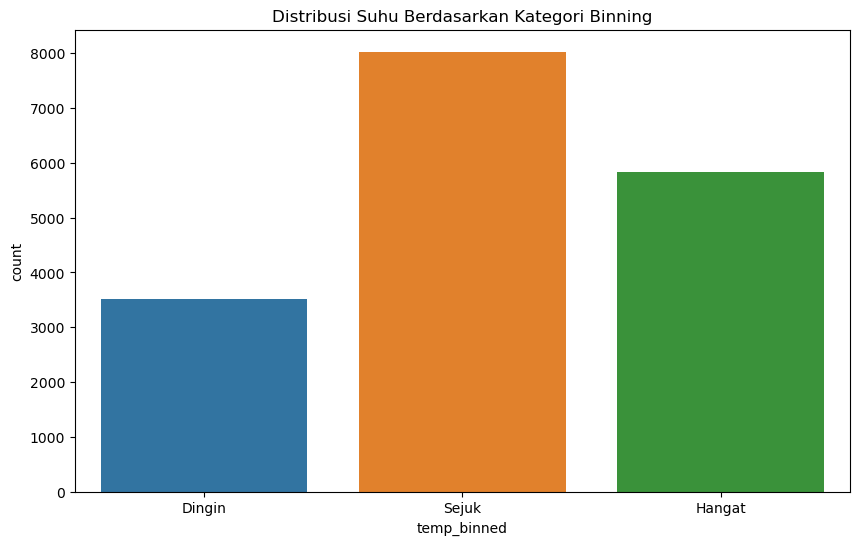

In [13]:
# Membagi suhu 'temp' ke dalam beberapa kategori menggunakan binning
temp_labels = ['Dingin', 'Sejuk', 'Hangat']
df_hour['temp_binned'] = pd.cut(df_hour['temp'], bins=[0, 0.3, 0.6, df_hour['temp'].max()], labels=temp_labels, include_lowest=True)

# Visualisasi distribusi kategori suhu
plt.figure(figsize=(10, 6))
sns.countplot(x='temp_binned', data=df_hour)
plt.title('Distribusi Suhu Berdasarkan Kategori Binning')
plt.show()

### Hubungan Jumlah Rental dan Suhu
Visualisasi terakhir menunjukkan hubungan antara kategori jumlah penyewaan sepeda dan kategori suhu, memberikan gambaran tentang bagaimana perubahan suhu mempengaruhi jumlah rental dalam berbagai kategori.

c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


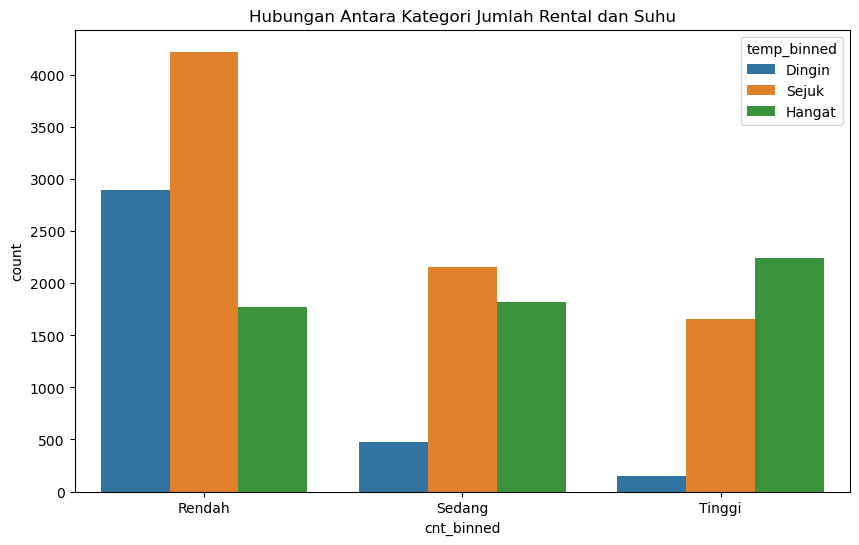

In [14]:
# Visualisasi hubungan antara kategori jumlah rental dan kategori suhu
plt.figure(figsize=(10, 6))
sns.countplot(x='cnt_binned', hue='temp_binned', data=df_hour)
plt.title('Hubungan Antara Kategori Jumlah Rental dan Suhu')
plt.show()

**Insight:**
- Suhu yang hangat secara signifikan meningkatkan aktivitas penyewaan sepeda. Pada suhu ini, volume penyewaan lebih tinggi, menunjukkan bahwa cuaca hangat mendorong lebih banyak orang untuk bersepeda.
- Pada suhu sejuk, aktivitas penyewaan cenderung lebih seimbang. Penyewaan tersebar secara merata, menunjukkan bahwa kondisi cuaca yang moderat menciptakan iklim yang ideal untuk bersepeda, baik untuk aktivitas rekreasi maupun transportasi.
- Suhu dingin tampaknya sangat menghambat penyewaan sepeda. Hampir tidak ada penyewaan yang terjadi dalam rentang suhu ini, terutama dalam kategori Tinggi dan Sedang, yang menandakan bahwa cuaca dingin tidak ideal untuk kegiatan bersepeda.

## Conclusion

- **Conclusion Pertanyaan 1:** Pengguna terdaftar cenderung menggunakan sepeda pada jam-jam sibuk pagi dan sore, mengindikasikan bahwa mereka lebih memanfaatkan sepeda sebagai sarana transportasi harian, seperti perjalanan ke dan dari tempat kerja. Sebaliknya, pengguna kasual lebih banyak menyewa sepeda di siang dan sore hari, kemungkinan besar untuk aktivitas santai atau rekreasi. Pola ini menunjukkan perbedaan yang signifikan antara kedua kelompok dalam cara mereka menggunakan layanan penyewaan sepeda.
- **Conclusion Pertanyaan 2:** Kondisi cuaca yang baik, seperti cerah atau sedikit berawan, sangat mendukung tingginya tingkat penyewaan sepeda. Namun, saat cuaca memburuk, terutama saat hujan ringan hingga hujan lebat, jumlah penyewaan sepeda menurun tajam. Ini menunjukkan bahwa penyewaan sepeda sangat sensitif terhadap perubahan cuaca, dan layanan ini lebih efektif ketika cuaca mendukung aktivitas luar ruangan.
- **Conclusion Analisis Lanjutan:** Suhu memainkan peran penting dalam memengaruhi aktivitas penyewaan sepeda. Suhu yang hangat secara jelas mendorong lebih banyak penyewaan, menunjukkan bahwa cuaca yang nyaman memotivasi orang untuk menggunakan sepeda, baik untuk transportasi maupun rekreasi. Sementara itu, pada suhu sejuk, aktivitas penyewaan tersebar lebih merata, mencerminkan kondisi cuaca yang seimbang dan cocok untuk bersepeda. Sebaliknya, pada suhu dingin, terjadi penurunan drastis dalam jumlah penyewaan, yang menegaskan bahwa cuaca dingin cenderung menghalangi orang untuk bersepeda, terutama dalam kategori dengan volume penyewaan tinggi. Hal ini memberikan wawasan bahwa perencanaan operasional dan pemasaran layanan berbagi sepeda harus memperhitungkan faktor cuaca, terutama suhu, untuk mengoptimalkan penggunaan sepeda.